In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm
import numpy as np

In [2]:
#Read the data
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#check for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

No missing data to handle.

In [5]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Marketing spend and R&D spend has a strong correlation.

In [6]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
data = pd.get_dummies(data,'State',drop_first = True)

In [8]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


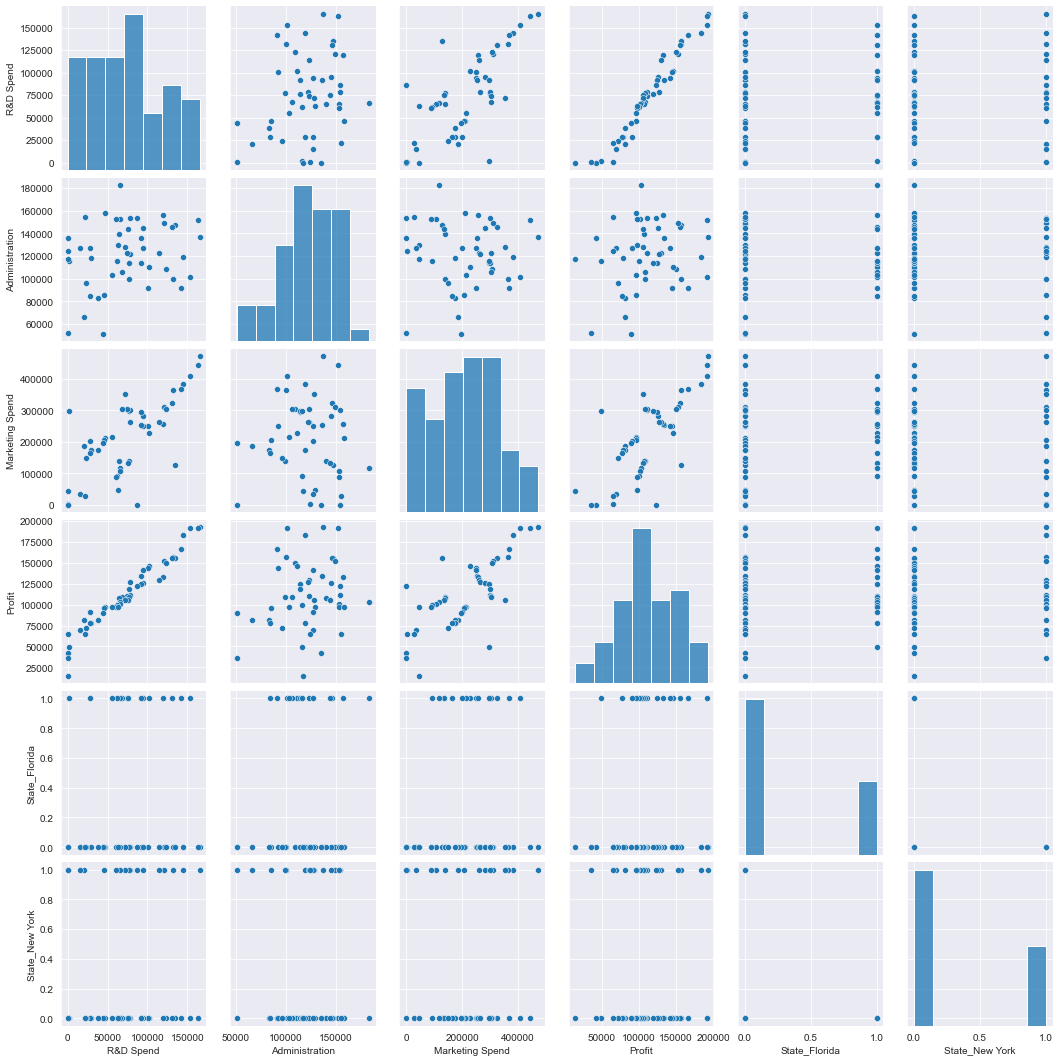

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [18]:
features = data.columns
features

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [19]:
df = data
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [20]:
y = data.iloc[:,3]
data.drop('Profit',axis = 1,inplace = True)

In [22]:
x = data.iloc[:,0:]
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


## Build Model

In [23]:
model1 = sm.OLS(y,x).fit()

In [24]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.986     
Dependent Variable:     Profit           AIC:                         1100.2944 
Date:                   2021-04-26 00:00 BIC:                         1109.8545 
No. Observations:       50               Log-Likelihood:              -545.15   
Df Model:               5                F-statistic:                 727.1     
Df Residuals:           45               Prob (F-statistic):          7.87e-42  
R-squared (uncentered): 0.988            Scale:                       1.9207e+08
---------------------------------------------------------------------------------
                      Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
R&D Spend              0.7182     0.0658  10.9157  0.0000      0.5857      0.8507
Administration         0.3113     0.0350   8.8850  0.0000      0.2407      0.3818
Marketing Spend        0.0786     0.0229   3.4285  0.0013      0.0324      0.1247
State_Florida       3464.4536  4905.4058   0.7063  0.4837  -6415.5407  13344.4479
State_New York      5067.8937  4668.2376   1.0856  0.2834  -4334.4195  14470.2070
--------------------------------------------------------------------------------
Omnibus:                   1.355             Durbin-Watson:               1.288 
Prob(Omnibus):             0.508             Jarque-Bera (JB):            1.241 
Skew:                      -0.237            Prob(JB):                    0.538 
Kurtosis:                  2.391             Condition No.:               828286
================================================================================
* The condition number is large (8e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

State_Florida and State_New York are insignificant.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
def get_vif_factors(X):
    X_matrix = X.to_numpy()
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    
    return vif_factors

In [31]:
vif_factors = get_vif_factors(x)
vif_factors

,column,VIF
0,R&D Spend,8.451019
1,Administration,4.950277
2,Marketing Spend,8.092278
3,State_Florida,2.004519
4,State_New York,1.928836


In [34]:
col_large_vif = vif_factors[vif_factors.VIF > 5].column
col_large_vif

0          R&D Spend
2    Marketing Spend
Name: column, dtype: object

since R&D has more vif ,we will remove R&D and build the model again.

In [35]:
x.drop('R&D Spend',axis=1,inplace = True)

In [37]:
model2 = sm.OLS(y,x).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.952     
Dependent Variable:     Profit           AIC:                         1163.0010 
Date:                   2021-04-26 00:12 BIC:                         1170.6490 
No. Observations:       50               Log-Likelihood:              -577.50   
Df Model:               4                F-statistic:                 246.4     
Df Residuals:           46               Prob (F-statistic):          1.98e-30  
R-squared (uncentered): 0.955            Scale:                       6.8541e+08
---------------------------------------------------------------------------------
                     Coef.     Std.Err.     t     P>|t|      [0.025      0.975]  
---------------------------------------------------------------------------------
Administration        0.4461     0.0619   7.2026  0.0000       0.3214      0.5707
Marketing Spend       0.2618     0.0295   8.8809  0.0000       0.2025      0.3211
State_Florida      -289.4163  9243.7800  -0.0313  0.9752  -18896.1804  18317.3477
State_New York     5782.6799  8817.6886   0.6558  0.5152  -11966.4066  23531.7664
--------------------------------------------------------------------------------
Omnibus:                   5.720             Durbin-Watson:               1.409 
Prob(Omnibus):             0.057             Jarque-Bera (JB):            5.101 
Skew:                      -0.496            Prob(JB):                    0.078 
Kurtosis:                  4.211             Condition No.:               791371
================================================================================
* The condition number is large (8e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [38]:
vif_factors = get_vif_factors(x)
vif_factors

,column,VIF
0,Administration,4.335170
1,Marketing Spend,3.751681
2,State_Florida,1.994668
3,State_New York,1.928456


No multicollinearity present now. But still the state variables are not significant.

### Transformation models

In [40]:
data.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [42]:
#taking squareroot of target variable
Y = np.sqrt(y)

In [44]:
model3 = sm.OLS(Y,data).fit()
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.977   
Dependent Variable:     Profit           AIC:                         539.7724
Date:                   2021-04-26 14:17 BIC:                         549.3325
No. Observations:       50               Log-Likelihood:              -264.89 
Df Model:               5                F-statistic:                 422.0   
Df Residuals:           45               Prob (F-statistic):          1.33e-36
R-squared (uncentered): 0.979            Scale:                       2599.1  
--------------------------------------------------------------------------------
                       Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
--------------------------------------------------------------------------------
R&D Spend              0.0009     0.0002    3.5416   0.0009     0.0004    0.0013
Administration         0.0015     0.0001   11.8032   0.0000     0.0013    0.0018
Marketing Spend        0.0003     0.0001    3.2256   0.0023     0.0001    0.0004
State_Florida         19.1316    18.0451    1.0602   0.2947   -17.2131   55.4763
State_New York        25.6156    17.1726    1.4916   0.1428    -8.9719   60.2030
------------------------------------------------------------------------------
Omnibus:                  0.448            Durbin-Watson:               1.385 
Prob(Omnibus):            0.799            Jarque-Bera (JB):            0.603 
Skew:                     0.126            Prob(JB):                    0.740 
Kurtosis:                 2.524            Condition No.:               828286
==============================================================================
* The condition number is large (8e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [45]:
#taking log of target variable
Y = np.log(y)

In [46]:
model4 = sm.OLS(Y,data).fit()
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.963   
Dependent Variable:     Profit           AIC:                         226.4912
Date:                   2021-04-26 14:24 BIC:                         236.0513
No. Observations:       50               Log-Likelihood:              -108.25 
Df Model:               5                F-statistic:                 261.1   
Df Residuals:           45               Prob (F-statistic):          4.77e-32
R-squared (uncentered): 0.967            Scale:                       4.9397  
---------------------------------------------------------------------------------
                     Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------------------
R&D Spend           -0.0000      0.0000    -1.0260    0.3104    -0.0000    0.0000
Administration       0.0001      0.0000    13.0402    0.0000     0.0001    0.0001
Marketing Spend      0.0000      0.0000     3.1030    0.0033     0.0000    0.0000
State_Florida        0.7707      0.7867     0.9797    0.3325    -0.8137    2.3552
State_New York       1.1488      0.7486     1.5345    0.1319    -0.3590    2.6567
------------------------------------------------------------------------------
Omnibus:                  1.775            Durbin-Watson:               1.462 
Prob(Omnibus):            0.412            Jarque-Bera (JB):            1.309 
Skew:                     0.396            Prob(JB):                    0.520 
Kurtosis:                 3.035            Condition No.:               828286
==============================================================================
* The condition number is large (8e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [50]:
#taking log of both sides
X = np.sqrt(data)

In [51]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,406.631529,369.997027,686.865416,0.0,1.0
1,403.234051,389.072731,666.257105,0.0,0.0
2,391.716109,318.033882,638.697534,1.0,0.0
3,379.963696,344.487808,619.031195,0.0,1.0
4,376.971272,302.310718,605.118517,1.0,0.0


In [52]:
Y = np.sqrt(y)

In [53]:
model5 = sm.OLS(Y,X).fit()
model5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.993   
Dependent Variable:     Profit           AIC:                         479.5048
Date:                   2021-04-26 14:34 BIC:                         489.0650
No. Observations:       50               Log-Likelihood:              -234.75 
Df Model:               5                F-statistic:                 1430.   
Df Residuals:           45               Prob (F-statistic):          2.26e-48
R-squared (uncentered): 0.994            Scale:                       778.66  
--------------------------------------------------------------------------------
                       Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
--------------------------------------------------------------------------------
R&D Spend              0.4940     0.0545    9.0554   0.0000     0.3841    0.6038
Administration         0.4646     0.0339   13.7007   0.0000     0.3963    0.5329
Marketing Spend        0.0849     0.0314    2.7003   0.0097     0.0216    0.1482
State_Florida          4.4776     9.9609    0.4495   0.6552   -15.5846   24.5399
State_New York        12.4059     9.5278    1.3021   0.1995    -6.7841   31.5959
------------------------------------------------------------------------------
Omnibus:                   0.106            Durbin-Watson:               1.435
Prob(Omnibus):             0.949            Jarque-Bera (JB):            0.191
Skew:                      0.101            Prob(JB):                    0.909
Kurtosis:                  2.774            Condition No.:               1874 
==============================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [56]:
#dropping the state variables
X1 = data.iloc[:,0:3]
X1.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [60]:
model6 = sm.OLS(Y,X1).fit()
model6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.977   
Dependent Variable:     Profit           AIC:                         538.3488
Date:                   2021-04-26 19:48 BIC:                         544.0849
No. Observations:       50               Log-Likelihood:              -266.17 
Df Model:               3                F-statistic:                 696.9   
Df Residuals:           47               Prob (F-statistic):          6.05e-39
R-squared (uncentered): 0.978            Scale:                       2620.1  
---------------------------------------------------------------------------------
                      Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------------------
R&D Spend             0.0009      0.0002     3.5279    0.0009    0.0004    0.0013
Administration        0.0016      0.0001    13.7647    0.0000    0.0014    0.0018
Marketing Spend       0.0003      0.0001     3.5626    0.0009    0.0001    0.0005
------------------------------------------------------------------------------
Omnibus:                   0.635            Durbin-Watson:               1.466
Prob(Omnibus):             0.728            Jarque-Bera (JB):            0.750
Skew:                      0.168            Prob(JB):                    0.687
Kurtosis:                  2.503            Condition No.:               10   
==============================================================================

"""

In [61]:
models = ['model1','model2','model3','model4','model5','model6']

In [63]:
R_square = [0.988,0.955,0.979,0.967,0.994,0.978]

In [68]:
AIC = [1100.29,1163.00,539.77,226.49,479.50,538.34]

In [64]:
performance_table = pd.DataFrame()

In [65]:
performance_table['Models'] = models

In [66]:
performance_table['R_square'] = R_square

In [69]:
performance_table['AIC'] = AIC

In [70]:
performance_table

,Models,R_square,AIC
0,model1,0.988,1100.29
1,model2,0.955,1163.00
2,model3,0.979,539.77
3,model4,0.967,226.49
4,model5,0.994,479.50
5,model6,0.978,538.34


Model4 has the least AIC but Model5 has the second least AIC along with maximum R-square value. So, we can select model 5.